In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Makes the graphs nicer

%config InlineBackend.figure_format = 'svg'

C:\Users\zpoet\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zpoet\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zpoet\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zpoet\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
#Download the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

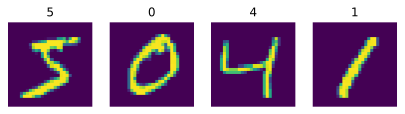

In [4]:
#quickly visualize the dataset
fig, axes = plt.subplots(1,4, figsize=(7, 3))
for img, label, ax in zip(x_train[:4], y_train[:4], axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()
    

In [5]:
print(f'train images: {x_train.shape}')
print(f'train labels: {y_train.shape}')
print(f'test images: {x_test.shape}')
print(f'test labels: {y_test.shape}')

train images: (60000, 28, 28)
train labels: (60000,)
test images: (10000, 28, 28)
test labels: (10000,)


In [44]:
#preprocessing - flatten images and scale images
x_train= x_train.reshape(60000, 28 * 28) /255
x_test = x_test.reshape(10000, 28 * 28) / 255

#one-hot encoding

with tf.Session() as sesh:
    y_train = sesh.run(tf.one_hot(y_train, 10))
    y_test = sesh.run(tf.one_hot(y_train, 10))

In [10]:
y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
# hyper parameters

learning_rate = 0.01
epochs = 20
batch_size = 100
batches = int(x_train.shape[0] / batch_size)

In [46]:
# define inputs
# X is our flattened and normalized images
# Y is our "one hot" labels 

#data

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

#learned or training variables
# weights and bias
# weights convert X to same shape as Y
# bias is the same shape as Y

W= tf.Variable(0.1 * np.random.randn(784, 10).astype(np.float32))
B = tf.Variable(0.1 * np.random.randn(10).astype(np.float32))

In [47]:
#define graph, cost function and optimizer

pred= tf.nn.softmax(tf.add(tf.matmul(X, W), B))

cost= tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), axis=1))

optimizer= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

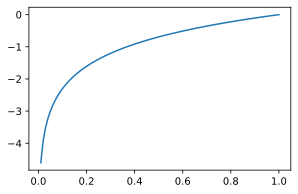

In [48]:
# natural log function looks like

x = np.linspace(1/100, 1, 100)
fig, ax = plt.subplots(1, figsize=(4.7, 3))
plt.plot(x, np.log(x))
plt.show()

In [35]:
#prediction

a = np.log([[0.04, 0.13, 0.96, 0.12], #correct prediction
          [0.01, 0.93, 0.06, 0.07]])  #incorrect prediction

#labels

b = np.array([[0, 0, 1, 0],
              [1, 0, 0, 0]])

-a * b

array([[0.        , 0.        , 0.04082199, 0.        ],
       [4.60517019, 0.        , 0.        , 0.        ]])

In [36]:
#taking the above prediction and compressing it into one value
r_sum= np.sum(-a * b, axis=1)

r_mean = np.mean(r_sum)

print(r_sum)
print(r_mean)

[0.04082199 4.60517019]
2.322996090254173


In [37]:
with tf.Session() as sesh:
    tf_sum = sesh.run(-tf.reduce_sum(a * b, axis=1))
    tf_mean = sesh.run(tf.reduce_mean(tf_sum))
    
print(f' sum = {tf_sum}')
print(f'mean = {tf_mean}')

 sum = [0.04082199 4.60517019]
mean = 2.322996090254173


In [50]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        for i in range(batches):
            offset= i * epoch
            x = x_train[offset: offset + batch_size]
            y = y_train[offset: offset + batch_size]
            sesh.run(optimizer, feed_dict={X:x,Y:y})
            c = sesh.run(cost, feed_dict={X:x,Y:y})
            
        if not epoch % 2:
            print(f'epoch:{epoch:2d} cost={c:.4f}')
            
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    acc = accuracy.eval({X: x_test, Y: y_test})
    print(f'Accuracy: {acc * 100:.2f}%')
    
    #plot
    
    fig, axes = plt.subplots(1, 10, figsize=(8, 4))
    for img, ax in zip(x_train[:10], axes):
        guess = np.argmax(sesh.run(pred, feed_dict={X: [img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((28, 28)))
        ax.axis('off')
        
        

ValueError: Cannot feed value of shape (100, 10, 10) for Tensor 'Placeholder_5:0', which has shape '(?, 10)'